In [1]:
%pylab inline
from ast import literal_eval
from struct import *
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

Populating the interactive namespace from numpy and matplotlib


##FA Grid
####By Sergio Daniel Hernandez Charpak

Notebook to try to interact with the Fractional Anisotropy (FA) grid directly from the CIC files. 
Here we read the results and plot them.

In [2]:
def writeFirstLine(filename,line):
    with open(filename,'r+') as f:
        content = f.read()
        f.seek(0,0)
        f.write(line.rstrip('\r\n') + '\n' + content)
def readFirstLine(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
        return first_line

The next function reads the eigenvalues

In [3]:
def read_CIC_scalar(filename):
    f = open(filename, "rb")
    dumb = f.read(38)

    dumb = f.read(4)
    n_x = f.read(4)
    n_y = f.read(4)
    n_z = f.read(4)
    nodes = f.read(8)
    x0 = f.read(4)
    y0 = f.read(4)
    z0 = f.read(4)
    dx = f.read(4)
    dy = f.read(4)
    dz = f.read(4)
    dumb = f.read(4)

    n_x = (unpack('i', n_x))[0]
    n_y = (unpack('i', n_y))[0]
    n_z = (unpack('i', n_z))[0]
    nodes = (unpack('q', nodes))[0]
    dx = (unpack('f', dx))[0]
    dy = (unpack('f', dy))[0]
    dz = (unpack('f', dz))[0]
    x0 = (unpack('f', x0))[0]
    y0 = (unpack('f', y0))[0]
    z0 = (unpack('f', z0))[0]
    print n_x, n_y, n_z, nodes, dx, dy, dz

    total_nodes = n_x * n_y *n_z
    dumb = f.read(4)
    array_data = f.read(total_nodes*4)
    dumb = f.read(4)
    format_s = str(total_nodes)+'f'
    array_data = unpack(format_s, array_data)
    f.close()
    array_data  = np.array(array_data)
    array_data.resize(n_z,n_y,n_x)
    array_data = array_data.transpose()
    return array_data


def read_CIC_vector(filename):
    f = open(filename, "rb")
    dumb = f.read(38)

    dumb = f.read(4)
    n_x = f.read(4)
    n_y = f.read(4)
    n_z = f.read(4)
    nodes = f.read(4)
    x0 = f.read(4)
    y0 = f.read(4)
    z0 = f.read(4)
    dx = f.read(4)
    dy = f.read(4)
    dz = f.read(4)
    dumb = f.read(4)

    n_x = (unpack('i', n_x))[0]
    n_y = (unpack('i', n_y))[0]
    n_z = (unpack('i', n_z))[0]
    nodes = (unpack('i', nodes))[0]
    dx = (unpack('f', dx))[0]
    dy = (unpack('f', dy))[0]
    dz = (unpack('f', dz))[0]
    x0 = (unpack('f', x0))[0]
    y0 = (unpack('f', y0))[0]
    z0 = (unpack('f', z0))[0]
    print n_x, n_y, n_z, nodes, dx, dy, dz

    total_nodes = 3 * n_x * n_y *n_z
    dumb = f.read(4)
    array_data = f.read(total_nodes*4)
    dumb = f.read(4)
    format_s = str(total_nodes)+'f'
    array_data = unpack(format_s, array_data)
    f.close()
    array_data  = np.array(array_data)
    array_data.resize(n_z,n_y,n_x,3)
    vec = array_data[0,0,0,:]
    vec = array_data[0,0,1,:]
    array_data = array_data.transpose()
    #final shape is [3,n_x,n_y,n_z]
    return array_data


#filein="/store/04/bolshoi/V-web/clues/256/snap_190.CIC.s1.00.eigenvec_1"
def test_vector_plot():
    filein="/home/extforer/TV-Web/data/snap_136.s1.00.eigenvec_1"
    eigenvec_1 = read_CIC_vector(filein)

    x_component = eigenvec_1[0,:,:,:]
    x_component = x_component.flatten()
    x_component = np.absolute(x_component)

    print x_component.shape
    nbins = 20
    mu_bins = np.linspace(0.0,1.0,nbins)
    
    histo_mu_x, mu_x_range = np.histogram(x_component, bins=mu_bins)
    histo_mu_x = 1.0*histo_mu_x
    
    delta_x = 1.0/(1.0*nbins)
    histo_mu_x = histo_mu_x/sum(histo_mu_x)/delta_x
    print histo_mu_x, mu_x_range


    rc('text', usetex=True)
    rc('font', family='serif')

#plt.plot(mu_x_range[:-1], histo_mu_x, label="$e_{3}\cdot \hat{x}$")

    plt.plot(histo_mu_x, histo_mu_x, label="$e_{3}\cdot \hat{x}$")

    ylim([0.8, 1.2])
    xlim([0.0, 1.0])
    plt.legend(loc='upper left')
    plt.xlabel("$M_{1500}$")
    plt.ylabel("$\Phi(M_{1500})$ (Mpc$^{-3}$ mag$^{-1}$)")
    plt.savefig('BOX10909_smooth_1.0_align_e3.pdf')


def test_FA_plot(file1, file2, file3):
    eigenval1  = read_CIC_scalar(file1)
    eigenval2  = read_CIC_scalar(file2)
    eigenval3  = read_CIC_scalar(file3)

    
    FA = (eigenval1-eigenval3)**2  + (eigenval2-eigenval3)**2  + (eigenval1-eigenval2)**2 
    FA = FA/(eigenval1**2 + eigenval2**2 + eigenval3**2)
    FA = np.sqrt(FA)/np.sqrt(3.0)

    cut = FA[40,:,:]

    plt.imshow(cut.T)
    print cut.min(), cut.max()
    plt.savefig('test_FA_cut.pdf')

In [4]:
inputfolder = '../../Outputs/07_04_2016/'
inputfile_1 = 'snapshot_005.eigen_1'
inputfile_2 = 'snapshot_005.eigen_2'
inputfile_3 = 'snapshot_005.eigen_3'

Now let us get the three eigenvalues grids

In [5]:
grid_1 = read_CIC_scalar(inputfolder+inputfile_1)
grid_2 = read_CIC_scalar(inputfolder+inputfile_2)
grid_3 = read_CIC_scalar(inputfolder+inputfile_3)

256 256 256 16777216 976.5625 976.5625 976.5625
256 256 256 16777216 976.5625 976.5625 976.5625
256 256 256 16777216 976.5625 976.5625 976.5625


Now let us form the FA grid

In [6]:
FA = (grid_1-grid_3)**2  + (grid_2-grid_3)**2  + (grid_1-grid_2)**2 
FA = FA/(grid_1**2 + grid_2**2 + grid_3**2)
FA = np.sqrt(FA)/np.sqrt(3.0)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


And the trace grid

<p> $\sum(\lambda) = \lambda_1 +\lambda_2+ \lambda_3$ </p>
<p> $\sum(\lambda) = -\nabla \cdot \overrightarrow{V} \propto \delta $ </p>

In [7]:
Trace = grid_1 + grid_2 + grid_3

In [8]:
n_x,n_y,n_z = shape(FA)

##A Region Accretion Algorithm

In [9]:
n_grid = n_x-1 # the size of box -1, the maximum index
results = np.zeros(shape(FA)) #preps the results matrix
thresh_FA = 0.8
thresh_Trace = 0.0
thresh_FA_seeds = 0.6
thresh_Trace_seeds = 1.0

<p> $\sum(\lambda) = -\nabla \cdot \overrightarrow{V} \propto \delta $ </p>

In [10]:
#Needs to pick the seeds. 

In [11]:
seed_list = []

In [12]:
counter = 0
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            if((FA[i,j,k]<thresh_FA_seeds ) & (Trace[i,j,k]>thresh_Trace_seeds)):
                counter +=1
                #print Trace[i,j,k]
                results[i,j,k] = counter
                seed_list.append([i,j,k])

In [13]:
print counter

129


In [14]:
#Predicate to be part of the group
def predicate(i,j,k, seed_FA):
    if(results[i,j,k]>=1):
        #It has already been evaluated
        #There is no need to re-evaluate the cell
        return False
    #elif( (FA[i,j,k]>=seed_FA) & (FA[i,j,k] <= thresh_FA) ):
    #elif( (FA[i,j,k] <= thresh_FA) ):
    elif( (FA[i,j,k] <= thresh_FA) & (Trace[i,j,k] >= thresh_Trace)):
    #elif((Trace[i,j,k] >= thresh_Trace)):
        #It validates the predicate
        return True
    else:
        #It fails the predicate
        return False

In [15]:
#The algorithm, it evaluates the special cases
def region_accretion_4_neigboors(i,j,k):
    present_FA = FA[i,j,k]
    present_region = results[i,j,k]
    #Finds if it is on the border of the grid
    case = 0
    #Cases
    if(i==0):
        case+=1
    if(j==0):
        case+=2
    if(k==0):
        case+=4
    if(i==n_grid):
        case+=8
    if(j==n_grid):
        case+=16
    if(k==n_grid):
        case+=32
    #General case
    if(case==0):
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
    #Special cases
    elif(case==1):
        #face in i=0 # not a border or a corner
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==2):
        #face in j=0 # not a border or a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==3):
        #border at i=0 & j=0 # not a corner 
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==4):
        #face in k=0 # not a border or a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==5):
        #border at i=0 & k=0 # not a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==6):
        #border at j=0 & k=0 # not a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==7):
        #corner at i=0 & j=0 & k=0 
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==8):
        #face in i=n_grid # not a border or a corner
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==10):
        #border in i=n_grid & j=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==12):
        #border i=n_grid & k=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k) 
    
    elif(case==14):
        # corner at i=n_grid & k=0 & j=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==16):
        #face in j=n_grid # not a border or a corner
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==17):
        #border j=n_grid & i=0
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        
    elif(case==20):
        #border j=n_grid & k=0
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==21):
        #corner j=n_grid & k=0 & i=0
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==24):
        #border j=n_grid & i=n_grid
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==28):
        #corner j=n_grid & k=0 & i=n_grid
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = present_region
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==32):
        #face in k=n_grid # not a border or a corner
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==33):
        #border k=n_grid & i=0
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==34):
        #border k=n_grid & j=0
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==35):
        #corner at k=n_grid & j=0 & i=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==40):
        #border k=n_grid & i=n_grid
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==42):
        #corner at k=n_grid & j=0 & i=n_grid
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = present_region
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==48):
        #border k=n_grid & j=n_grid
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==49):
        #corner at k=n_grid & j=n_grid & i=0
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = present_region
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)

    elif(case==56):
        #corner at k=n_grid & j=n_grid & i=n_grid
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = present_region
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = present_region
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = present_region
            region_accretion_4_neigboors(i,j,k-1)
    else:
        #it is one of the impossible cases
        print "There is an error for [i,jk]: [" +str(i)+","+str(j)+","+str(k)+"]"
        print "The case encountered was: "+str(case)

In [16]:
#Constants for writting the result of the shape of the respective detected group
CASES = []
CASE_0 = "none of the above"
CASES.append(CASE_0)
CASE_1 = "spherical top"
CASES.append(CASE_1)
CASE_2 = "oblate symmetric top"
CASES.append(CASE_2)
CASE_3 = "prolate symmetric top"
CASES.append(CASE_3)
CASE_4 = "asymmetric top"
CASES.append(CASE_4)

In [17]:
n_grid = n_x-1 # the size of box -1, the maximum index
#results = np.zeros(shape(FA)) #preps the results matrix
thresh_FA = 0.8
thresh_Trace = 0.0

<p>Setting a higher recursion limit</p>
<p>Apparently it is risky to higher it </p>
https://docs.python.org/2/library/sys.html#sys.setrecursionlimit

In [18]:
import sys
sys.setrecursionlimit(10000)

In [19]:
for (i,j,k) in seed_list:
    region_accretion_4_neigboors(i,j,k)

In [20]:
for m in range(counter):
    print seed_list[m]

[4, 21, 18]
[4, 21, 19]
[11, 22, 107]
[11, 121, 166]
[11, 211, 254]
[12, 13, 9]
[12, 77, 6]
[12, 105, 216]
[12, 190, 246]
[16, 23, 207]
[21, 202, 134]
[22, 12, 201]
[22, 27, 23]
[25, 1, 48]
[29, 249, 241]
[31, 189, 65]
[37, 3, 195]
[38, 3, 241]
[38, 5, 240]
[40, 172, 42]
[44, 193, 112]
[45, 12, 144]
[45, 115, 127]
[48, 176, 65]
[49, 177, 64]
[50, 103, 182]
[52, 112, 0]
[54, 138, 68]
[55, 57, 39]
[57, 43, 167]
[57, 193, 157]
[57, 246, 184]
[58, 44, 165]
[59, 18, 231]
[61, 45, 171]
[61, 212, 40]
[62, 15, 14]
[70, 76, 94]
[71, 30, 12]
[72, 35, 6]
[72, 209, 3]
[73, 33, 7]
[73, 34, 6]
[73, 34, 7]
[74, 207, 3]
[74, 208, 2]
[74, 210, 1]
[78, 54, 226]
[80, 49, 151]
[82, 173, 226]
[82, 200, 230]
[84, 194, 14]
[85, 67, 86]
[87, 8, 112]
[93, 245, 229]
[94, 0, 224]
[96, 103, 238]
[97, 104, 238]
[100, 21, 166]
[105, 158, 133]
[106, 158, 133]
[110, 247, 199]
[116, 105, 144]
[118, 178, 1]
[120, 131, 172]
[123, 165, 43]
[124, 12, 177]
[126, 113, 176]
[129, 80, 206]
[134, 34, 130]
[135, 59, 93]
[142, 1

In [21]:
results_list = []
results_x = []
results_y = []
results_z = []
results_group = []
volumes = np.zeros(counter+1)
counter_results = 0
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            if(results[i,j,k]>0.0):
                counter_results+=1
                results_list.append([i,j,k])
                results_x.append(i)
                results_y.append(j)
                results_z.append(k)
                results_group.append(results[i,j,k])
                volumes[results[i,j,k]] += 1

In [22]:
print "Number of cells in groups:", counter_results
print "For numbero of seeds:", counter

Number of cells in groups: 35392
For numbero of seeds: 129


Now we form the Tensor Inertia Matrix to analyze the shapes of the detected groups

El volumen maximo es: 3761.0
Para el grupo: 24


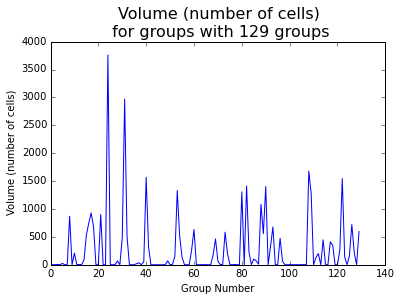

In [23]:
fig = plt.figure()
x_axis = np.arange(0, len(volumes))
plt.plot(x_axis,volumes)
plt.title('Volume (number of cells) \n for groups with '+str(counter) + ' groups', fontsize=16)
plt.xlabel('Group Number')
plt.ylabel('Volume (number of cells)')
#plt.savefig("volumes_plot_"+str(counter)+".png",format = 'png')
#plt.close(fig)
print "El volumen maximo es:", np.max(volumes)
print "Para el grupo:", np.argmax(volumes)

Now we form the Tensor Inertia Matrix to analyze the shapes of the detected groups

In [41]:
def calcultate_inertia_tensor(group_number):
    #First we need to find the center of mass (CM)
    sum_mx = 0
    sum_my = 0
    sum_mz = 0
    sum_Trace = 0.0
    for i in range(counter_results):
        if(results_group[i]==group_number):
            sum_mx += Trace[results_x[i],results_y[i],results_z[i]] * results_x[i]
            sum_my += Trace[results_x[i],results_y[i],results_z[i]] * results_y[i]
            sum_mz += Trace[results_x[i],results_y[i],results_z[i]] * results_z[i]
            sum_Trace += Trace[results_x[i],results_y[i],results_z[i]]
    if (sum_Trace == 0):
        #There is no overdensity
        print "The total overdensity of the group "+ str(group_number)
        print sum_Trace
        return -10
    #We get now the x,y,z of the CM
    x_CM = sum_mx / sum_Trace
    y_CM = sum_my / sum_Trace
    z_CM = sum_mz / sum_Trace
    print "The Center of mass coordinates for group "+ str(group_number)
    print x_CM, y_CM, z_CM
    print "The total overdensity of the group "+ str(group_number)
    print sum_Trace
    #We now form the Inertia Tensor for the group
    #http://scipython.com/book/chapter-6-numpy/problems/p65/the-moment-of-inertia-tensor/ 
    #The positions must be relative to their center of mass
    sum_xy = 0
    sum_yz = 0
    sum_zx = 0
    sum_x_square = 0
    sum_y_square = 0
    sum_z_square = 0
    for i in range(counter_results):
        if(results_group[i]==group_number):
            sum_xy += ((np.fabs(results_x[i] - x_CM)) * (np.fabs(results_y[i] - y_CM)))
            sum_x_square+=((np.fabs(results_x[i] - x_CM))**2)
            sum_yz += ((np.fabs(results_y[i] - y_CM)) * (np.fabs(results_z[i] - z_CM)))
            sum_y_square+=((np.fabs(results_y[i] - y_CM))**2)
            sum_zx += ((np.fabs(results_z[i] - z_CM))* (np.fabs(results_x[i] - x_CM)))
            sum_z_square+=((np.fabs(results_z[i] - z_CM))**2)
    I_xx = sum_y_square + sum_z_square
    I_yy = sum_x_square + sum_z_square
    I_zz = sum_x_square + sum_y_square

    I_xy = - sum_xy
    I_yz = - sum_yz
    I_xz = - sum_zx
    I_matrix = np.matrix([[I_xx, I_xy, I_xz], [I_xy, I_yy, I_yz], [I_xz, I_yz, I_zz]])
    I_a, I_b, I_c = np.linalg.eigvalsh(I_matrix)
    print "Intertia eigenvalues for group number: "+ str(group_number)
    print I_a, I_b, I_c
    case = 0
    #Case 1 Ia=Ib=Ic: spherical top;
    if(I_a==I_b==I_c):
        case = 1
        print CASE_1
        return case
    #Case 2 Ia=Ib<Ic: oblate symmetric top;
    elif(I_a==I_b < I_c):
        case = 2
        print CASE_2
        return case
    #Case 3 Ia<Ib=Ic: prolate symmetric top;
    elif(I_a < I_b == I_c):
        case = 3
        print CASE_3
        return case
    #Case 4 Ia<Ib<Ic: asymmetric top
    elif(I_a < I_b < I_c):
        case = 4
        print CASE_4
        return case
    #Case 0 - ?
    else:
        case = 0
        print CASE_0
        return case

In [43]:
inertia_groups = volumes = np.zeros(counter+1)
inertia_cases = np.zeros(5)
for k in range(counter):
    case_k = calcultate_inertia_tensor(k)
    if(case_k != -10 ):
        inertia_groups[k] = case_k
        inertia_cases[case_k] +=1

The total overdensity of the group 0
0.0
The Center of mass coordinates for group 1
4.61481828514 21.0 18.2614017656
The total overdensity of the group 1
7.76950258017
Intertia eigenvalues for group number: 1
0.132551239077 1.22436930956 1.35692054864
asymmetric top
The Center of mass coordinates for group 2
4.0 20.5928365915 19.0
The total overdensity of the group 2
3.94119663537
Intertia eigenvalues for group number: 2
0.0 0.51723726543 0.51723726543
prolate symmetric top
The Center of mass coordinates for group 3
11.0360455069 22.1986990443 106.537351192
The total overdensity of the group 3
5.5927667683
Intertia eigenvalues for group number: 3
1.12251059297 4.94839761905 5.55202104134
asymmetric top
The Center of mass coordinates for group 4
11.0 121.0 166.465317193
The total overdensity of the group 4
2.24519771338
Intertia eigenvalues for group number: 4
0.0 0.502405794143 0.502405794143
prolate symmetric top
The Center of mass coordinates for group 5
12.6245647207 210.245751775 2

El case mas ocurrido es: 4 asymmetric top
Con numero de ocurrencias: 70.0


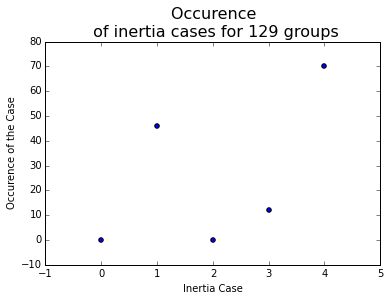

In [44]:
fig = plt.figure()
x_axis = np.arange(0, len(inertia_cases))
plt.scatter(x_axis,inertia_cases)
plt.title('Occurence \n of inertia cases for '+str(counter) + ' groups', fontsize=16)
plt.xlabel('Inertia Case')
plt.ylabel('Occurence of the Case')
#plt.savefig("inertia_plot_"+str(counter)+".png",format = 'png')
#plt.close(fig)
most_occured_case = np.argmax(inertia_cases)
print "El case mas ocurrido es:", most_occured_case, CASES[most_occured_case]
print "Con numero de ocurrencias:", np.max(inertia_cases)

In [46]:
print "-------------------------------------------"
print "Case", "Case Number", "Number of occurences"
for i in range (len(inertia_cases)):
    print str(CASES[i]), str(i), str(inertia_cases[i])

-------------------------------------------
Case Case Number Number of occurences
none of the above 0 0.0
spherical top 1 46.0
oblate symmetric top 2 0.0
prolate symmetric top 3 12.0
asymmetric top 4 70.0


###Plotting
<p>Here we make some plots, we will see if in the python script we make them due to the memory issues.</p>

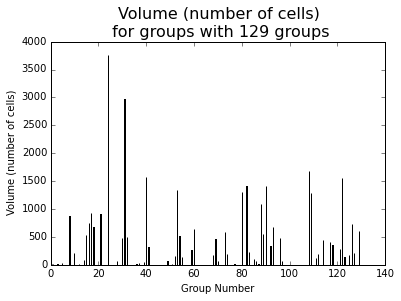

In [68]:
fig = plt.figure()
binwidth=0.1
plt.hist(results_group, bins=np.arange(min(results_group), max(results_group) + binwidth, binwidth))
plt.xlabel('Group Number')
plt.ylabel('Volume (number of cells)')
plt.title('Volume (number of cells) \n for groups with '+str(counter) + ' groups', fontsize=16)
plt.savefig("volumes_hist_+"str(counter)+".png",format = 'png')
plt.close(fig)

In [97]:
from mpl_toolkits.mplot3d import Axes3D

In [98]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_x,results_y,results_z,s=2, c=results_group)
ax.set_xlim3d(0, 256)
ax.set_ylim3d(0, 256)
ax.set_zlim3d(0, 256)
ax.set_xlabel('i', size=30)
ax.set_ylabel('j', size=30)
ax.set_zlabel('k', size=30)
ax.set_title('Regions obtained at scale with the simulation', size=35)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.savefig("regions_3D_"+str(counter)+".png",format = 'png')
plt.close(fig)

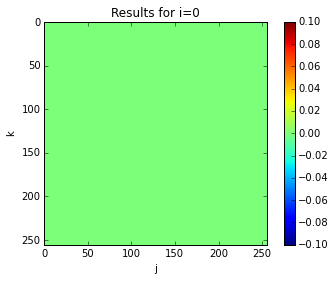

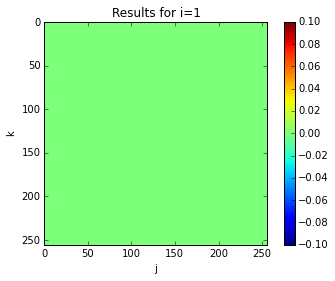

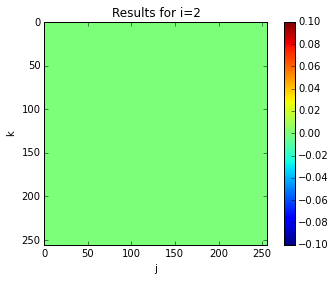

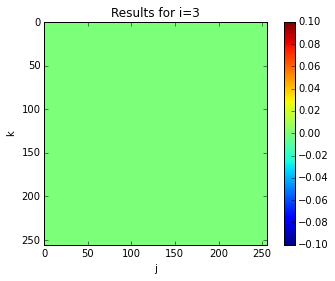

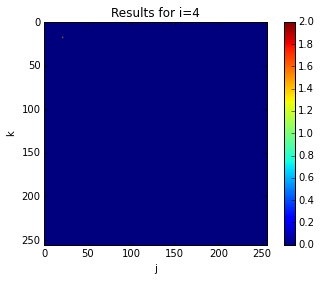

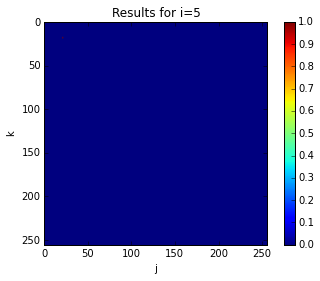

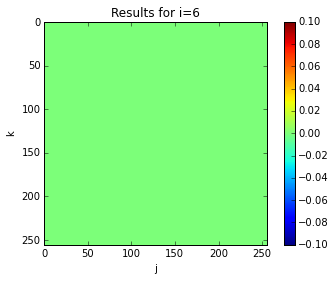

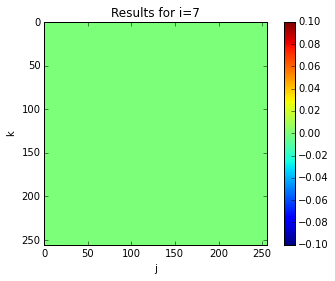

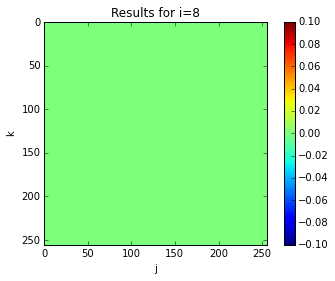

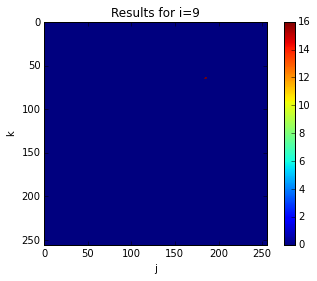

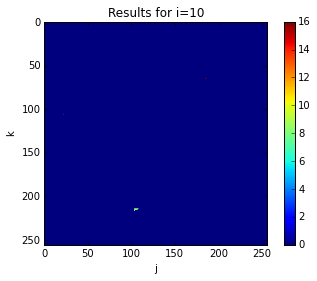

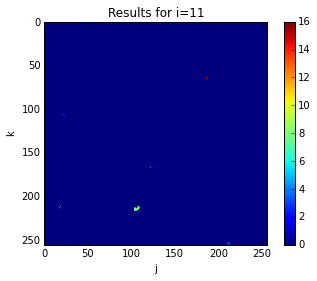

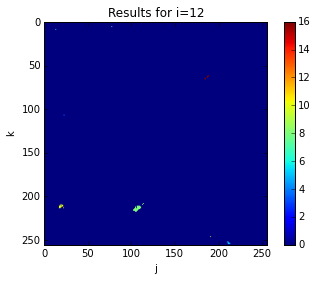

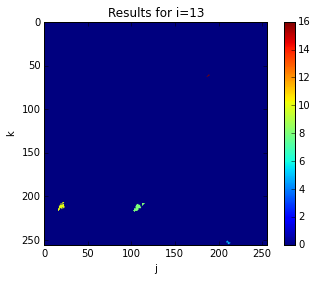

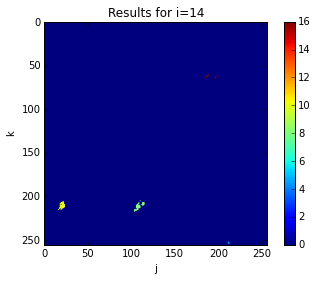

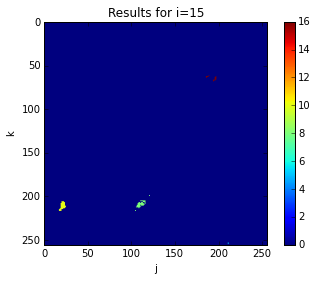

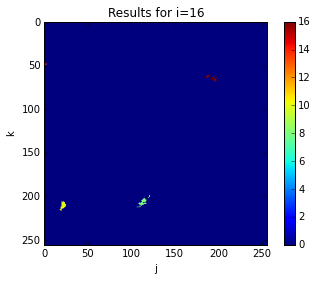

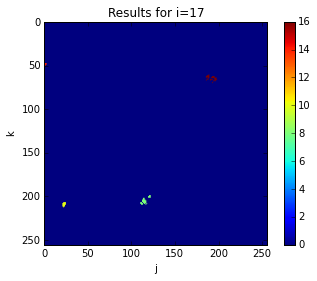

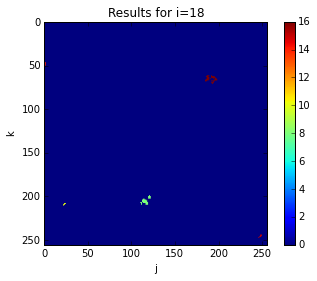

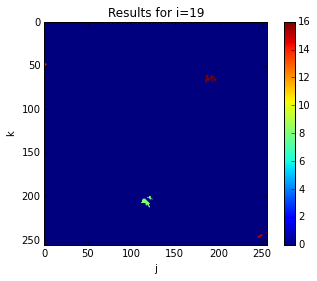

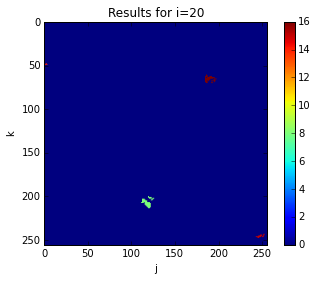

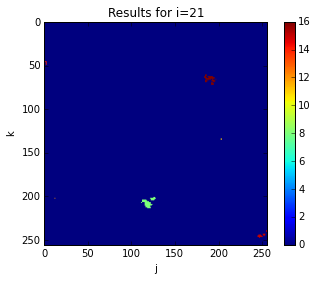

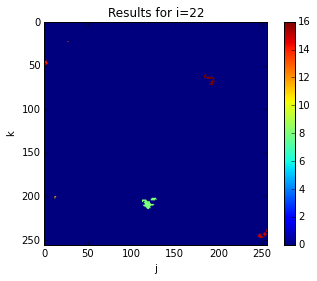

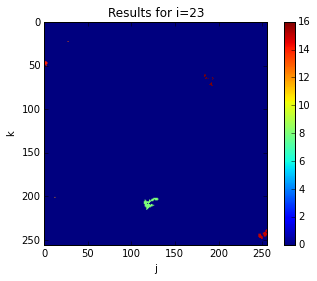

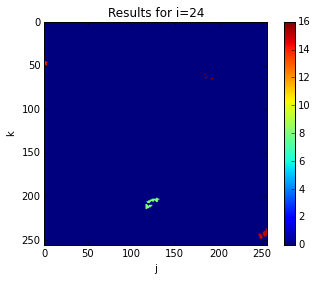

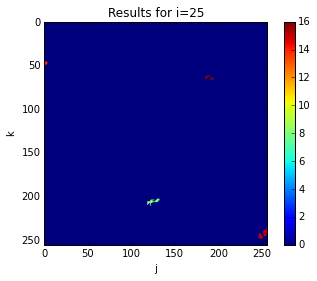

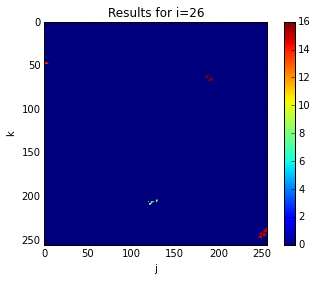

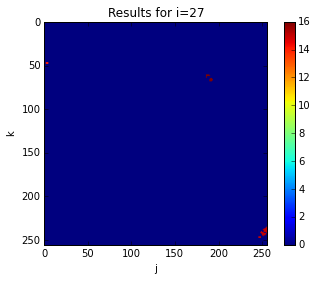

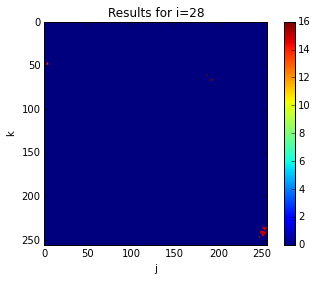

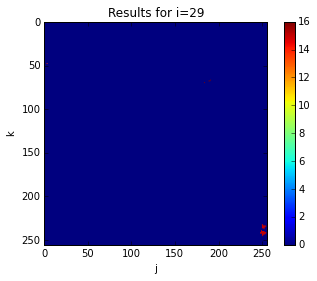

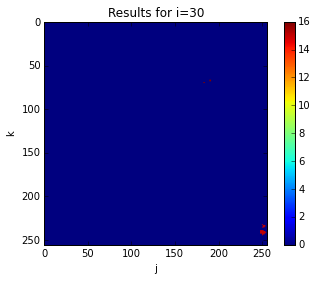

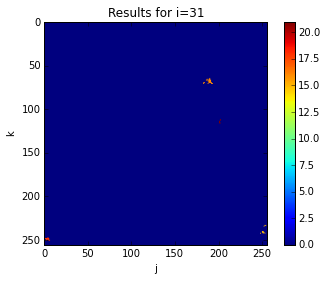

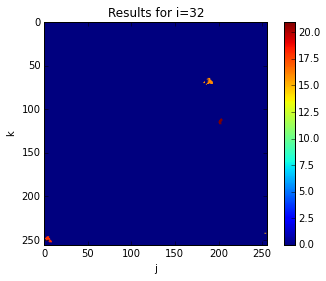

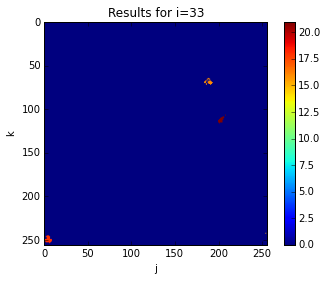

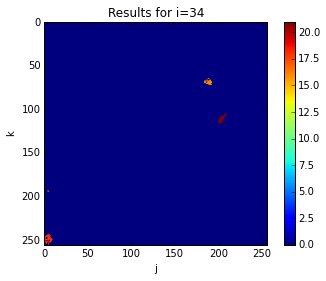

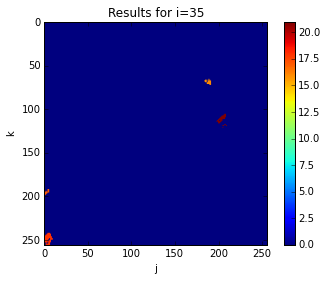

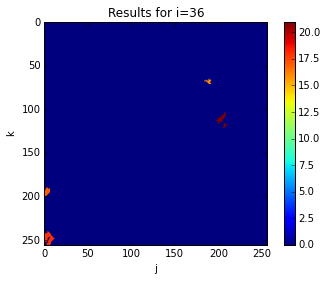

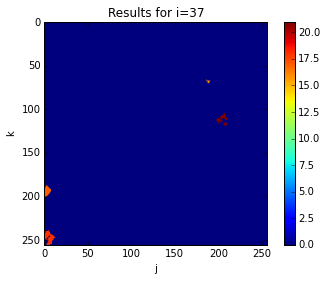

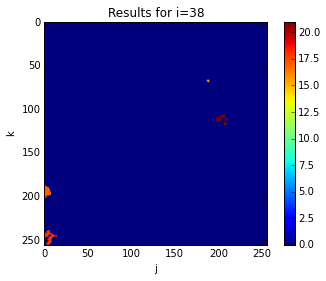

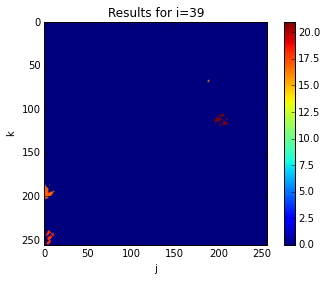

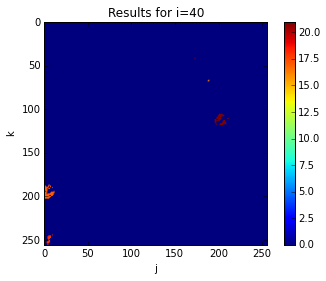

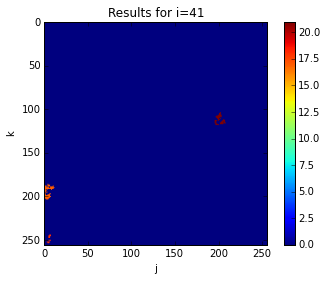

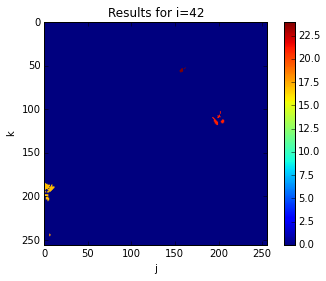

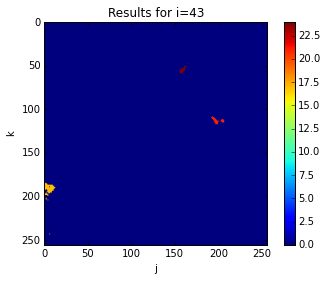

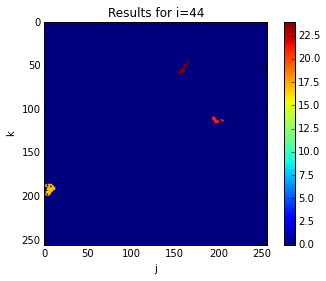

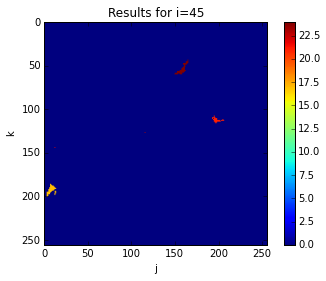

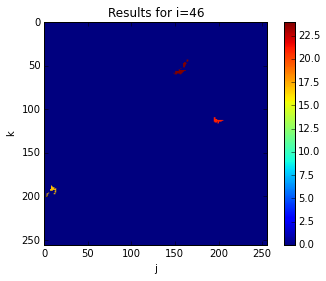

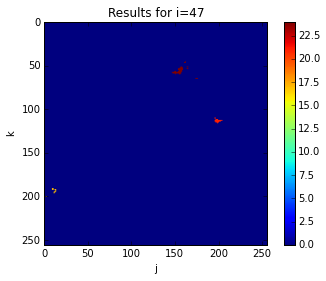

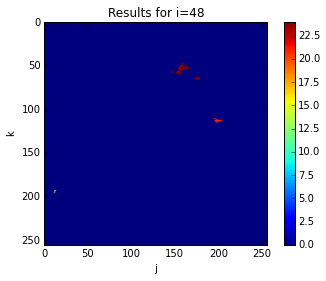

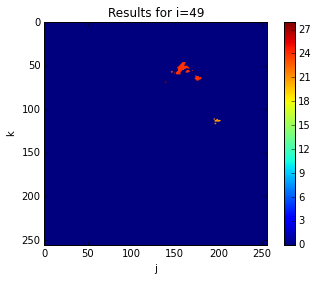

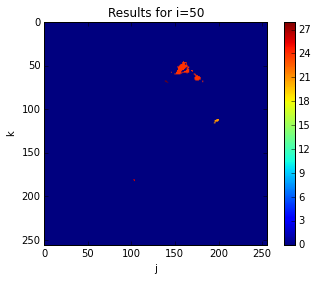

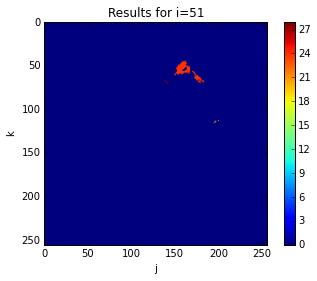

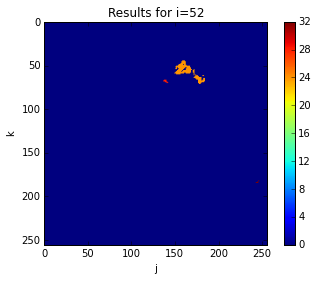

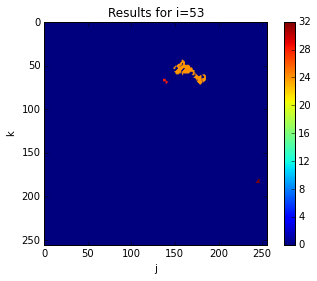

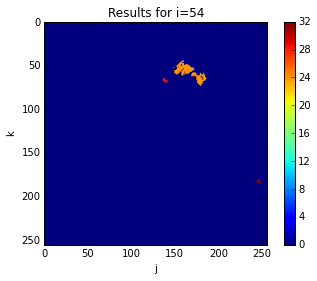

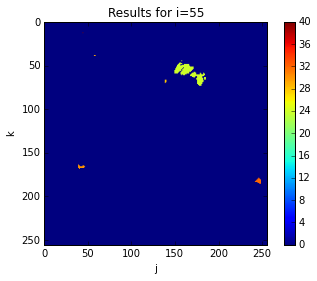

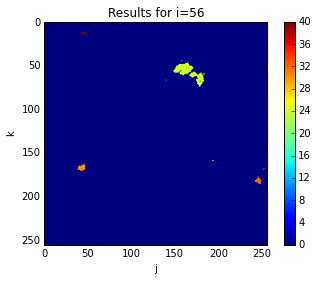

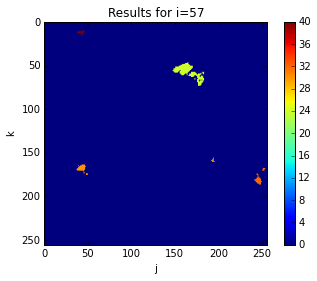

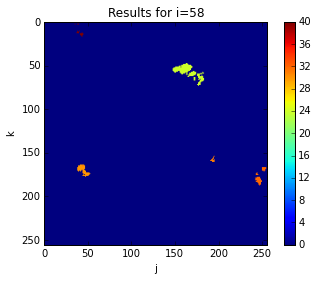

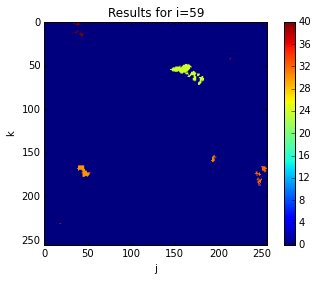

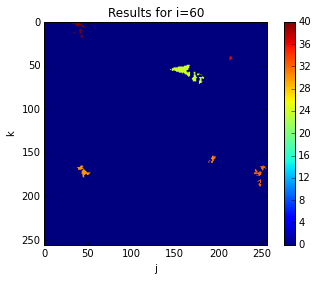

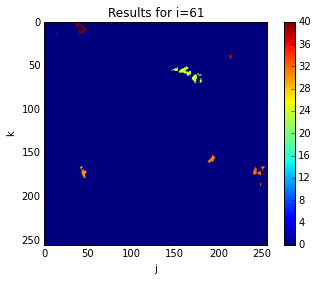

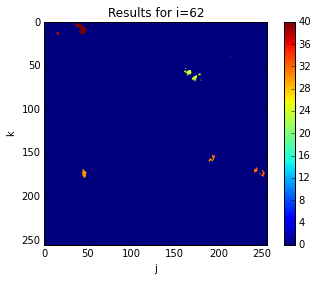

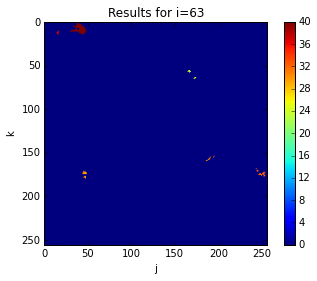

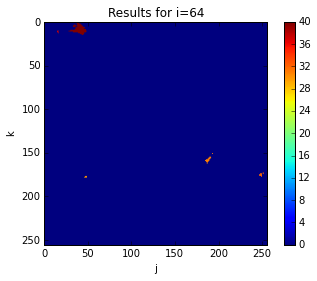

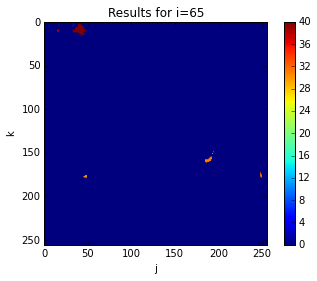

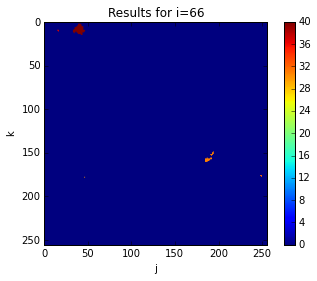

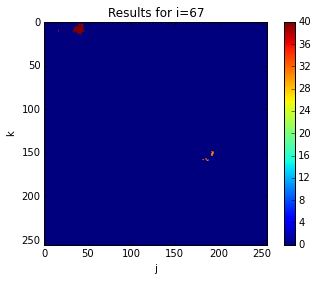

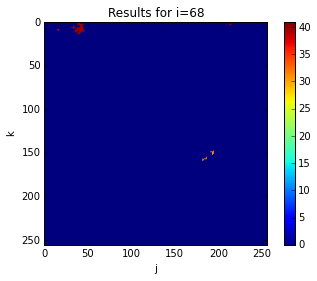

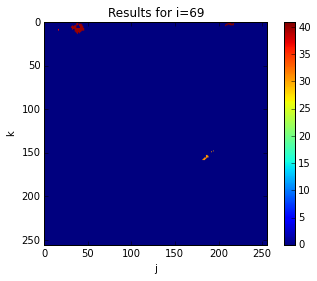

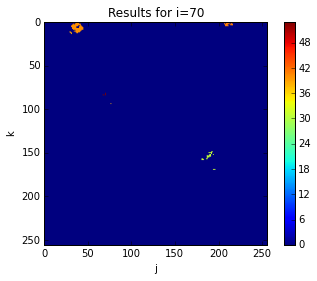

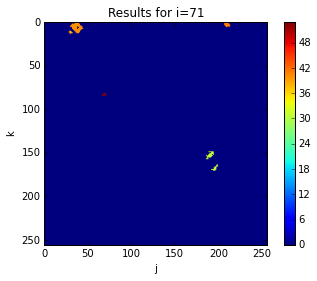

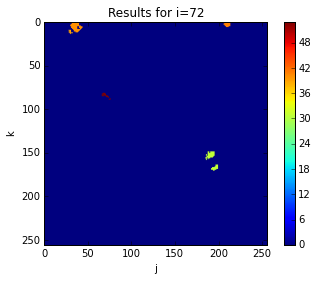

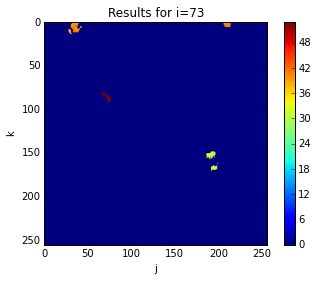

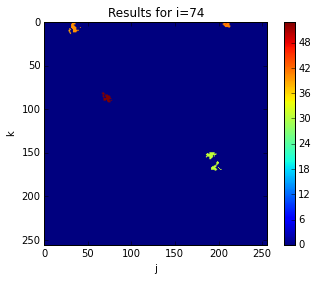

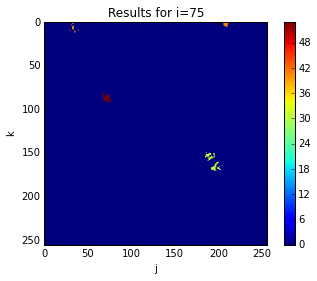

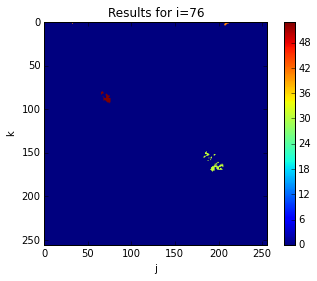

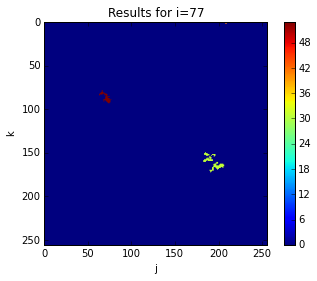

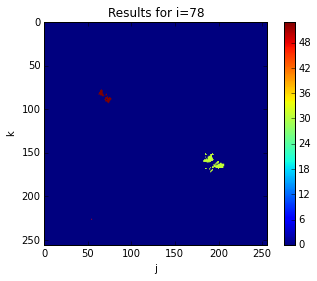

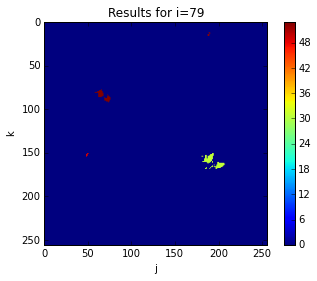

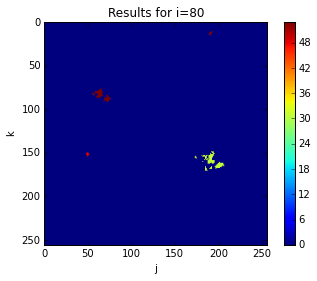

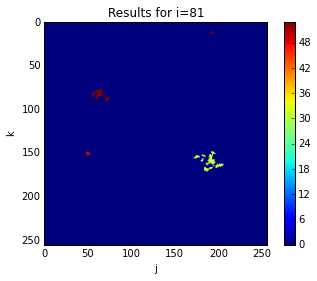

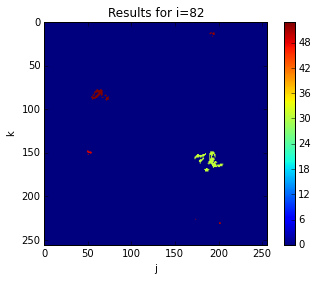

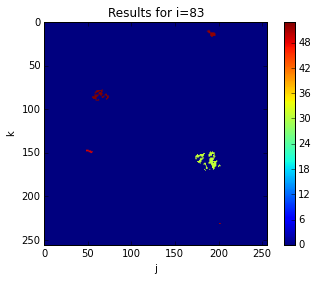

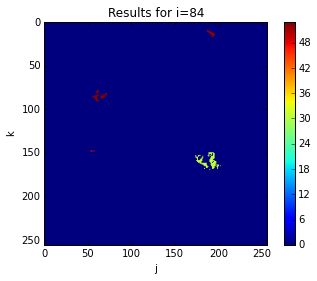

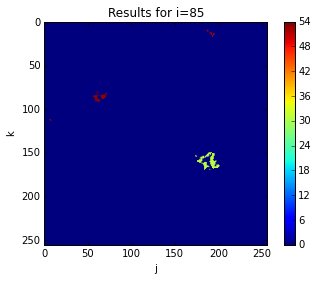

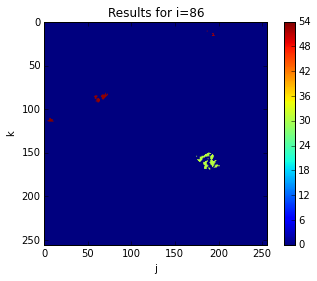

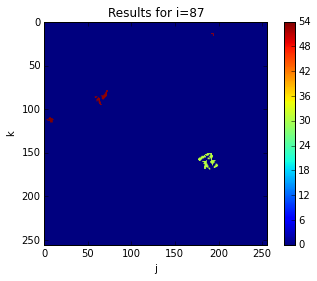

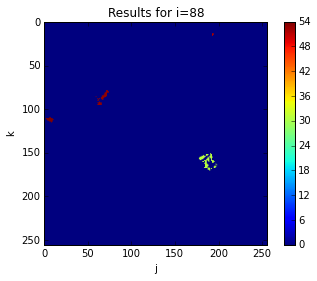

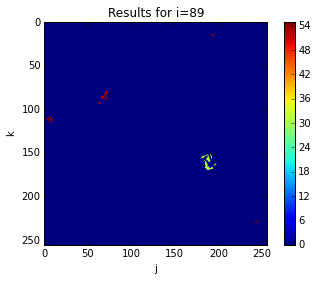

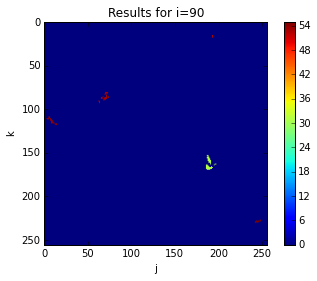

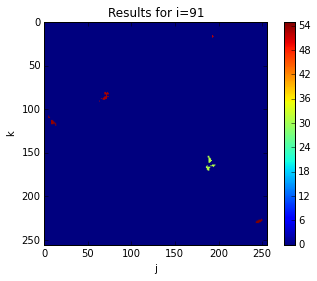

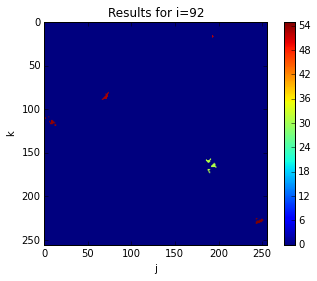

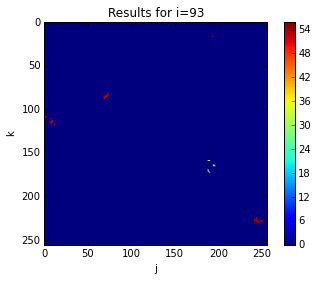

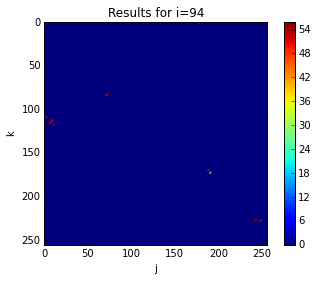

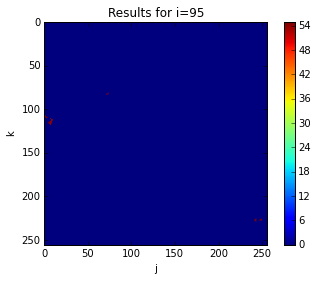

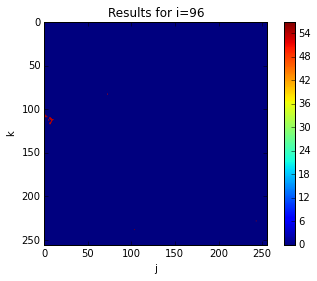

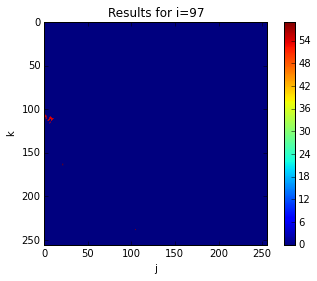

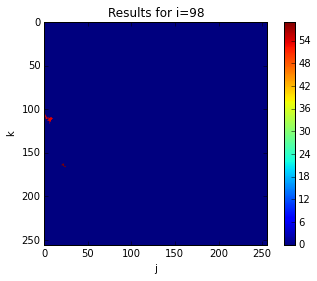

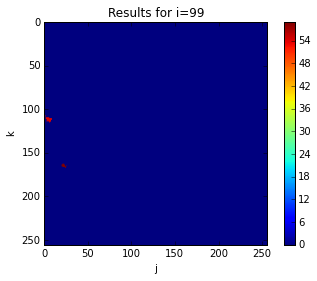

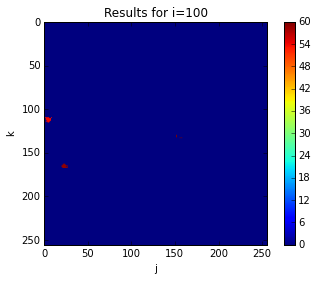

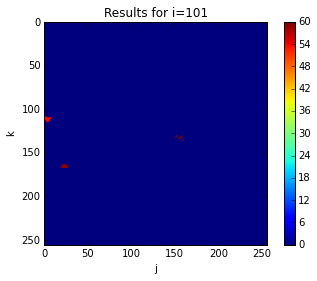

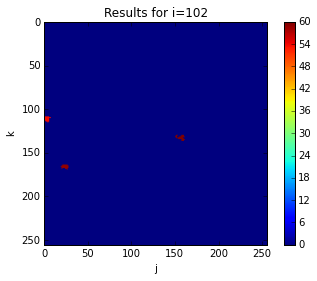

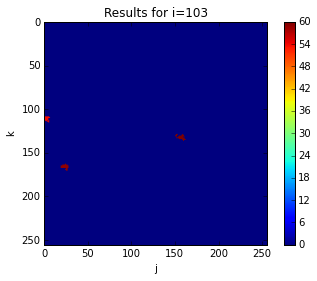

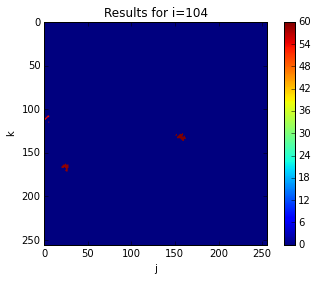

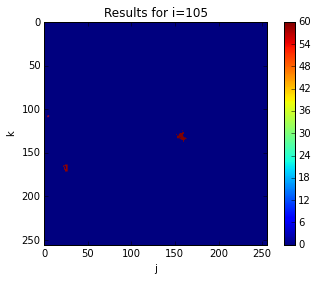

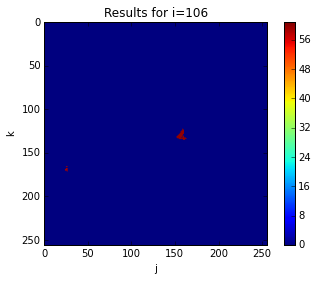

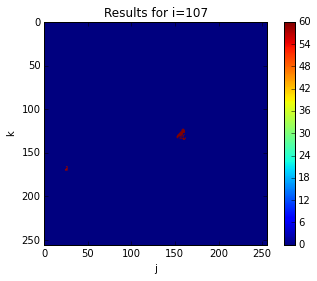

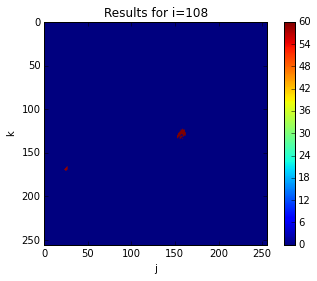

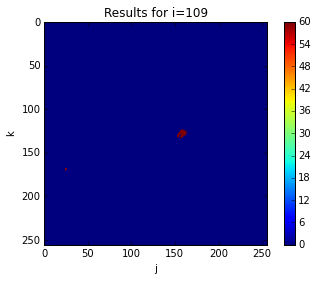

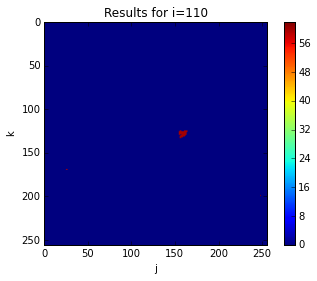

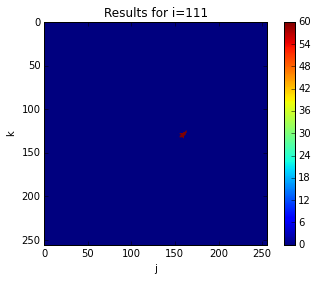

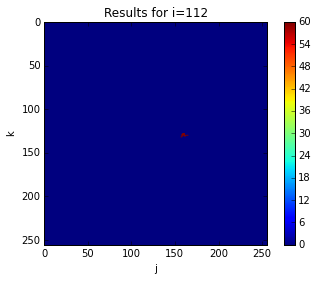

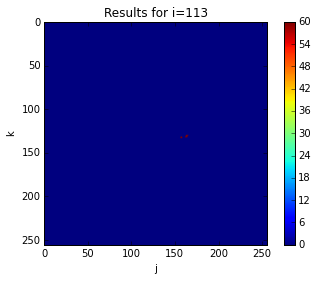

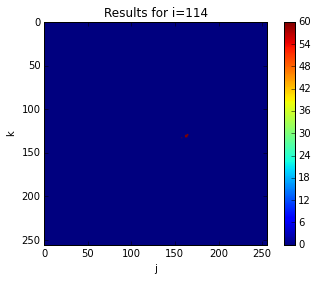

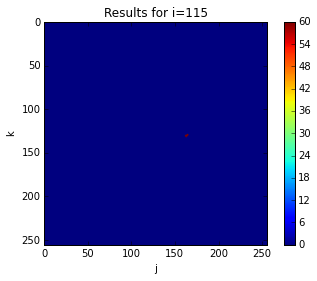

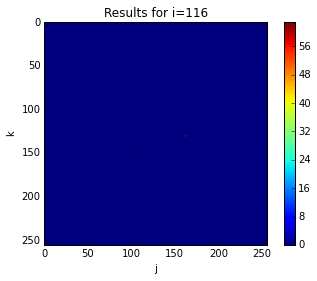

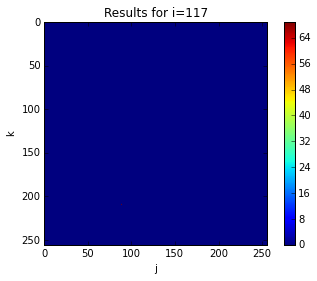

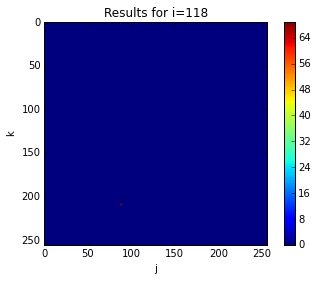

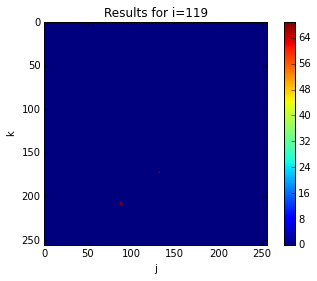

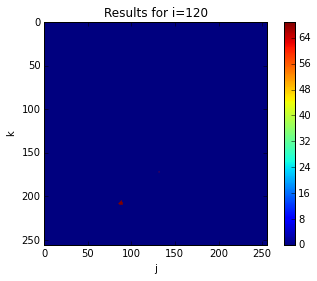

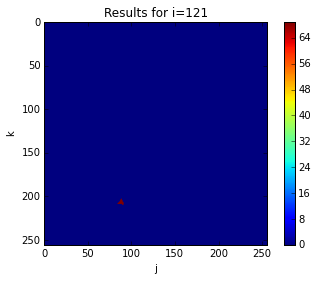

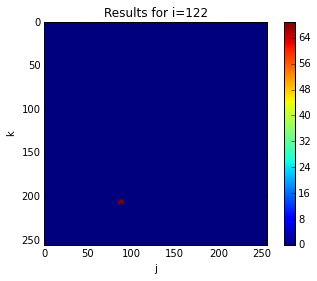

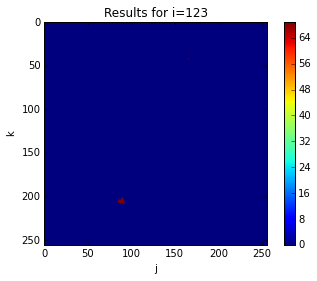

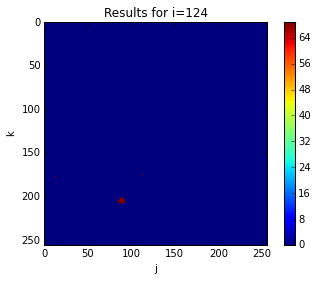

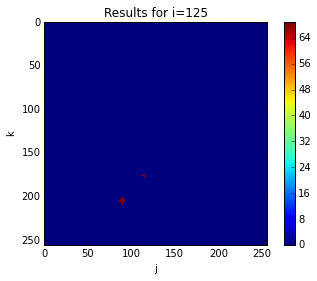

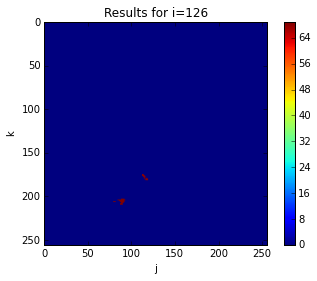

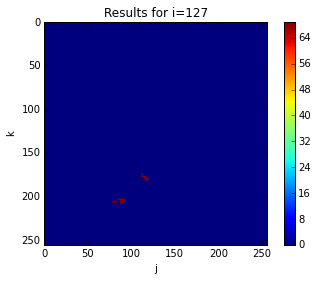

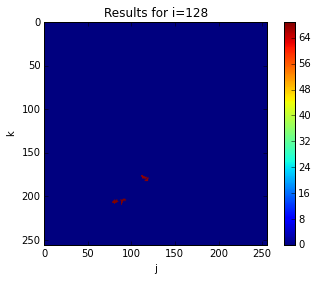

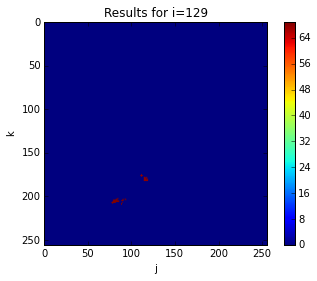

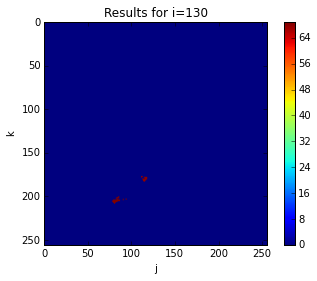

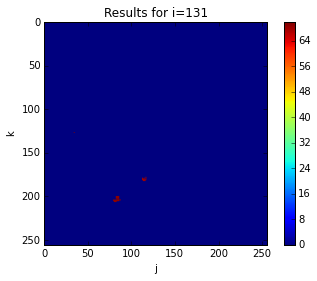

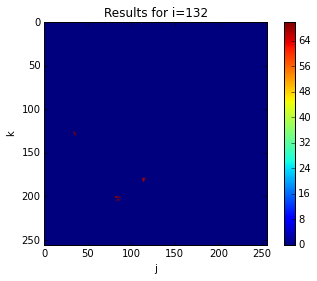

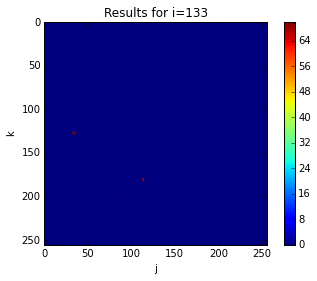

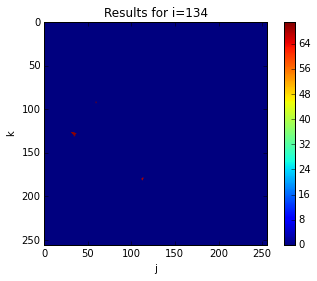

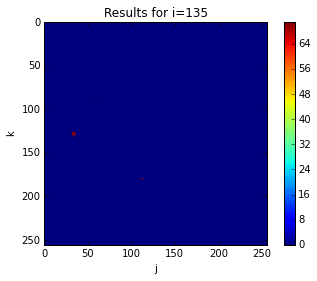

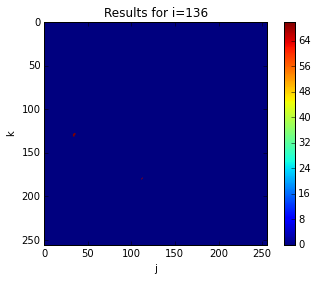

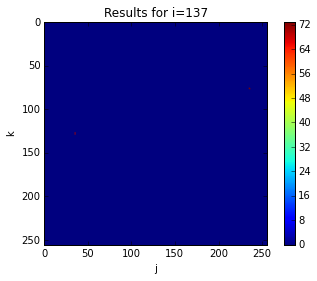

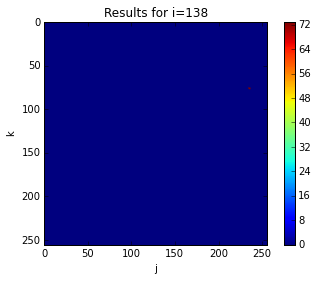

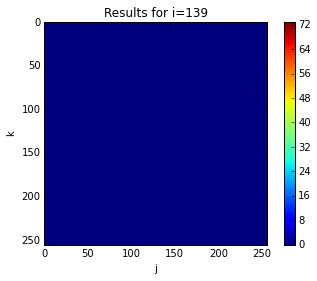

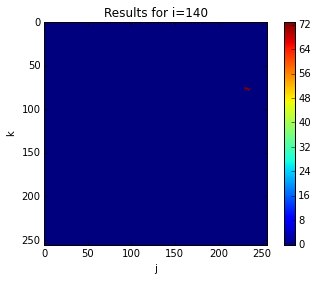

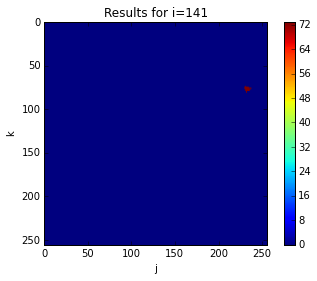

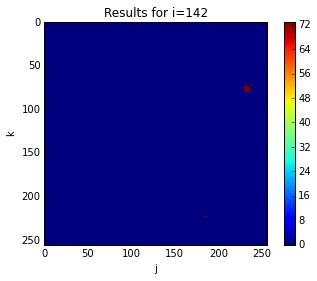

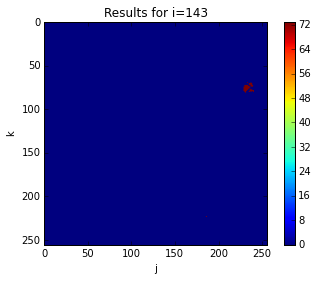

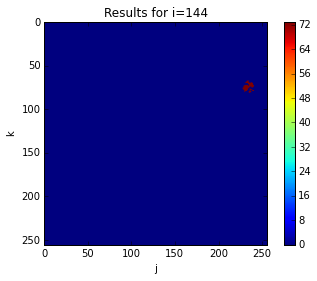

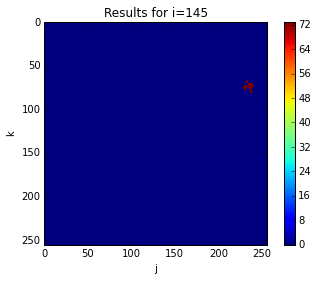

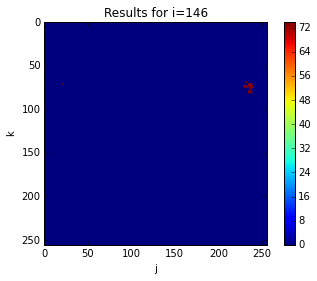

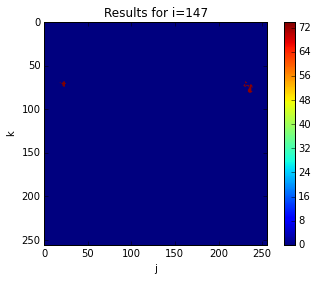

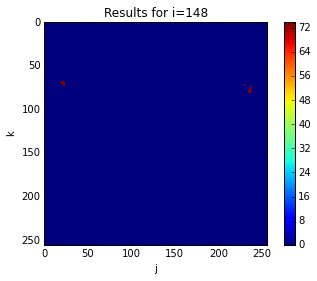

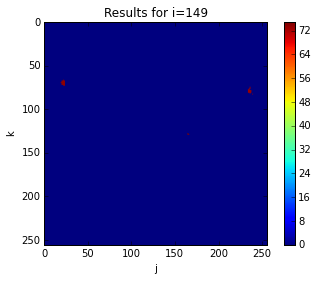

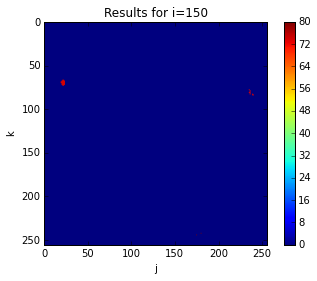

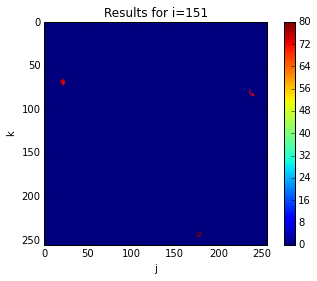

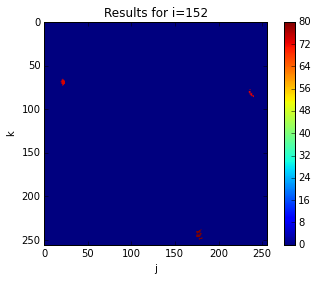

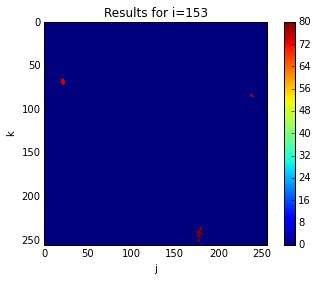

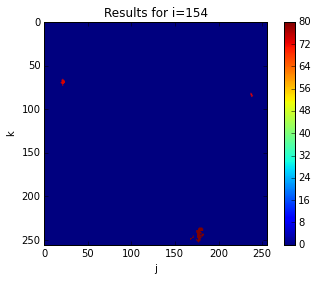

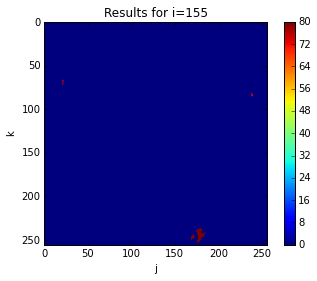

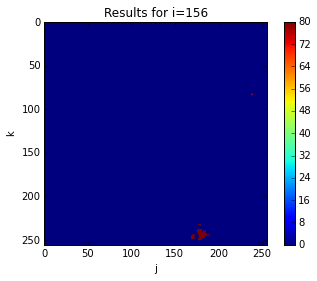

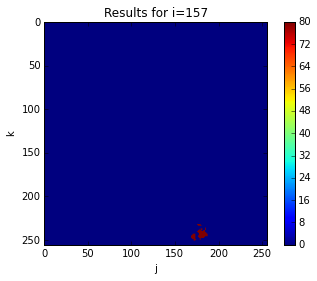

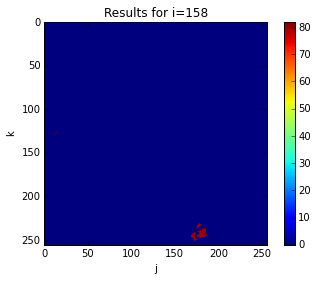

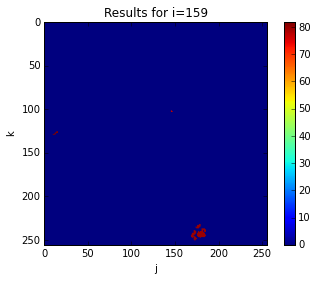

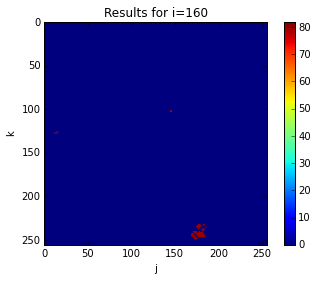

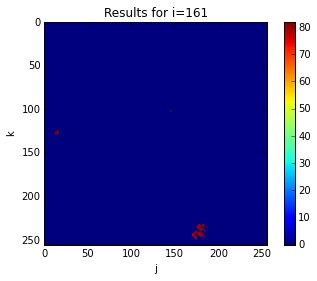

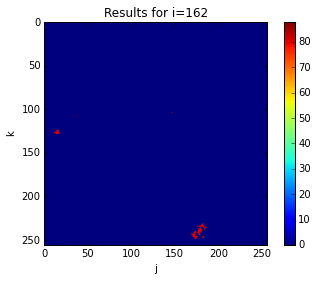

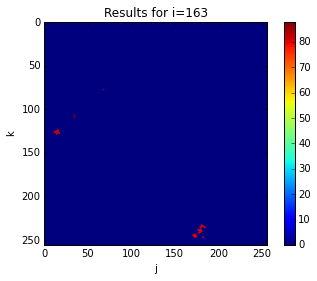

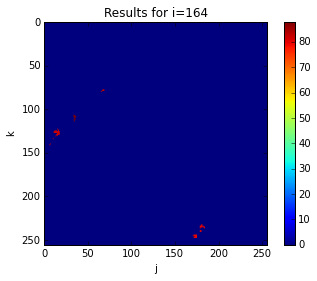

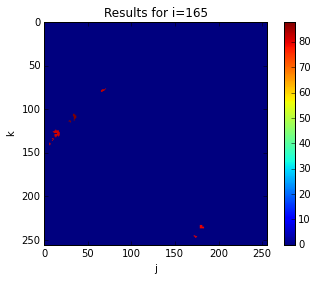

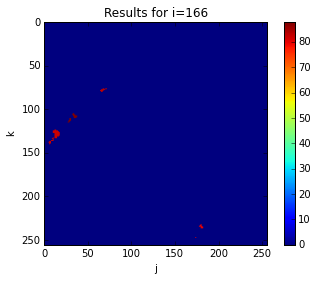

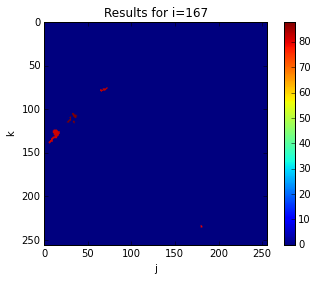

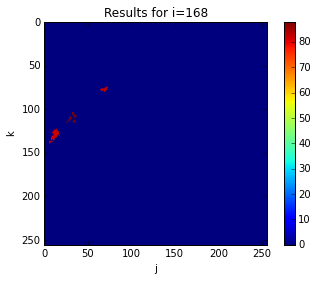

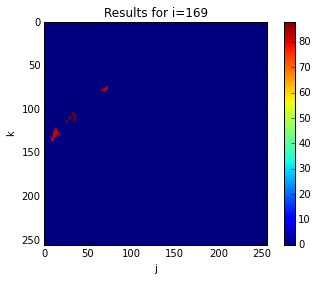

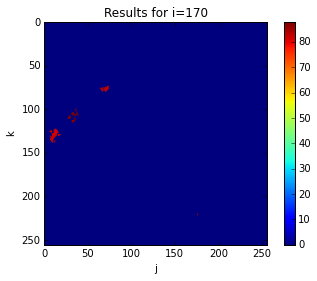

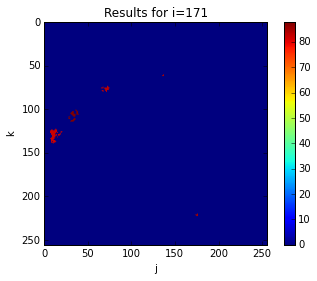

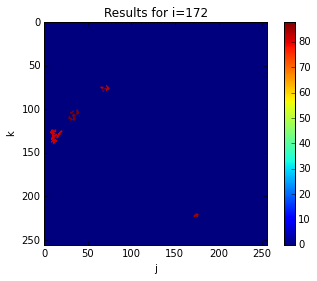

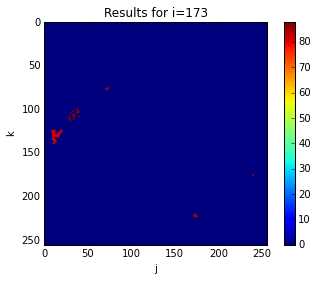

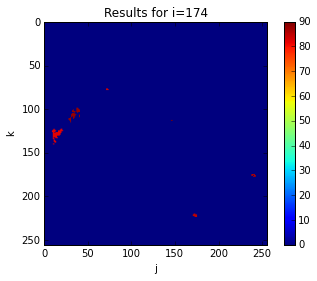

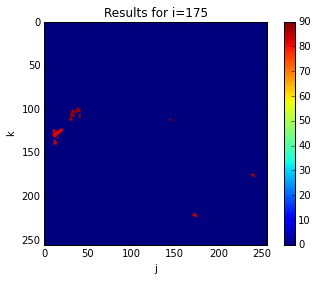

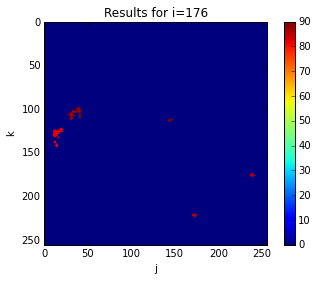

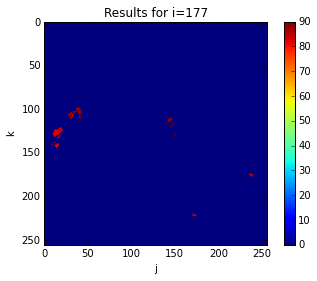

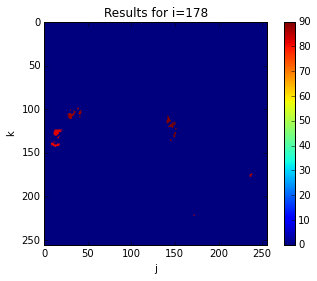

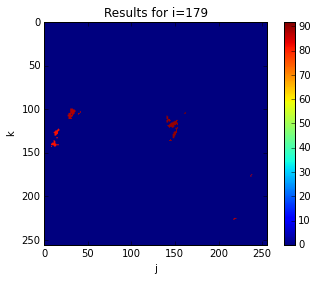

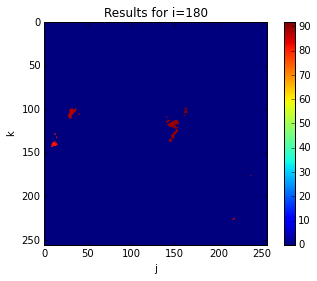

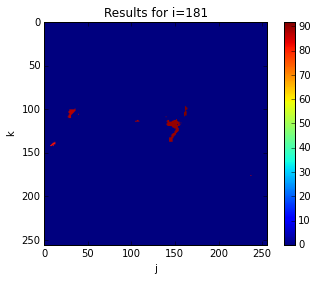

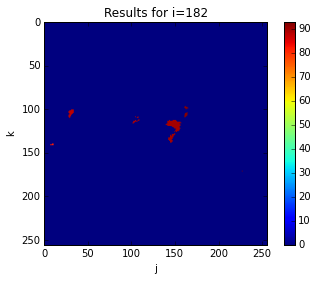

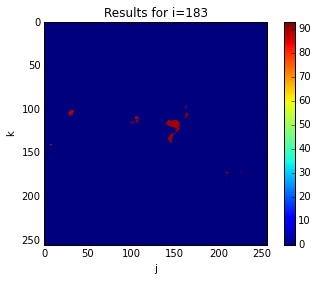

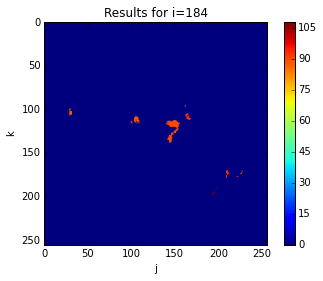

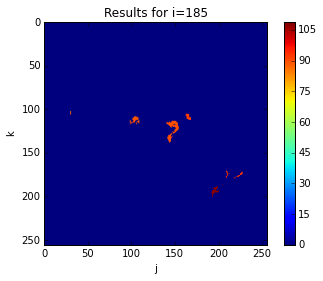

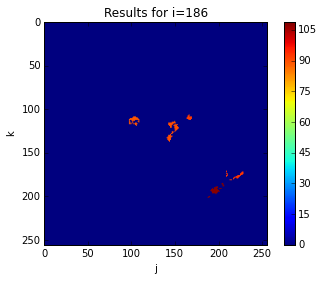

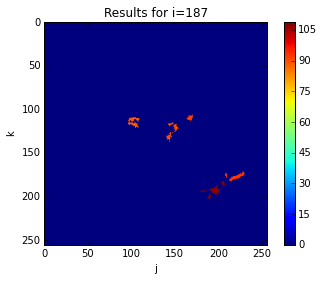

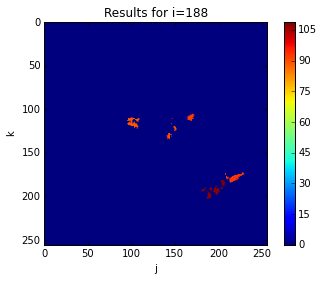

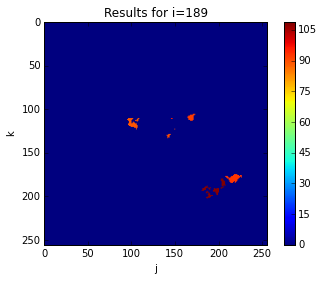

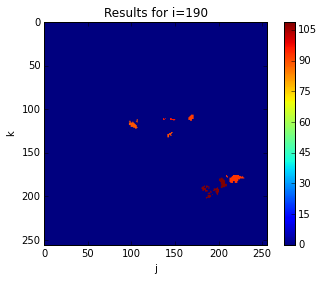

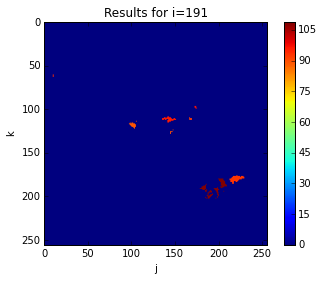

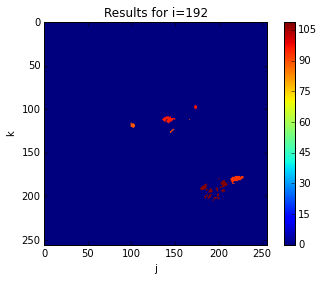

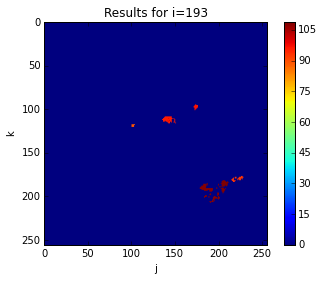

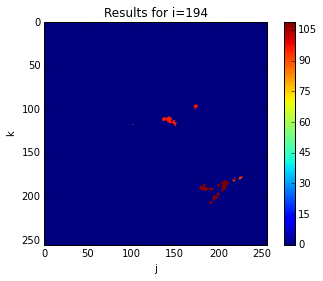

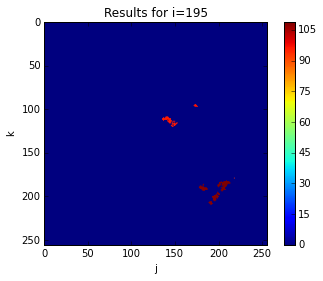

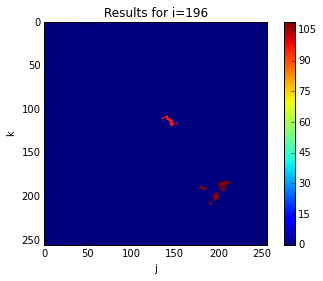

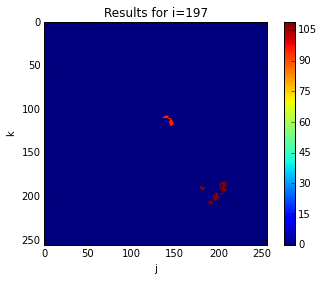

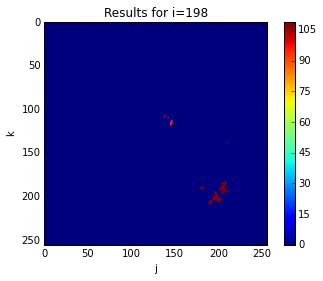

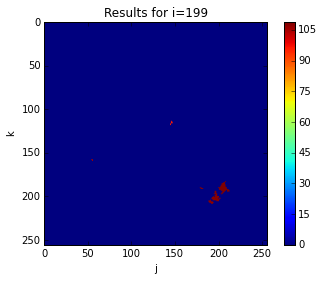

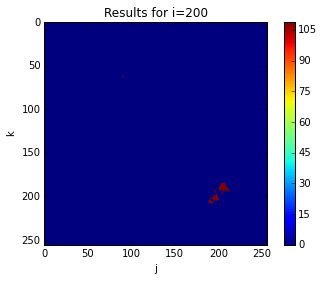

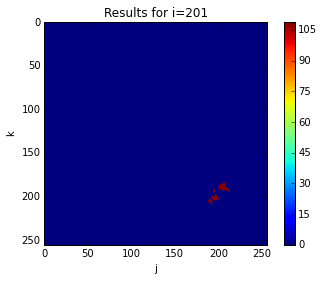

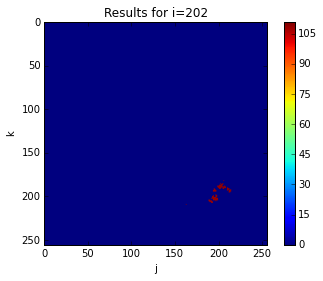

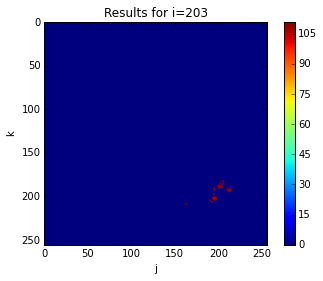

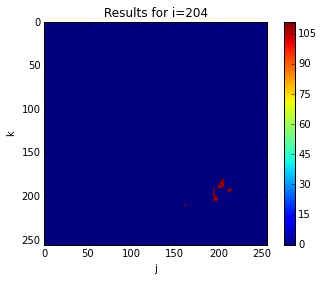

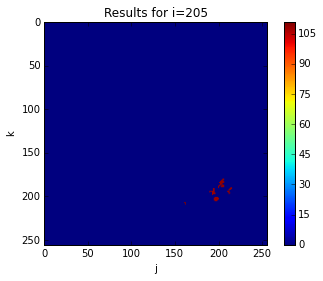

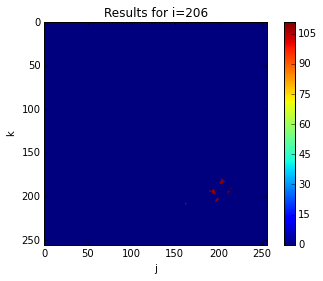

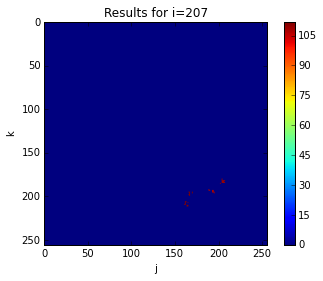

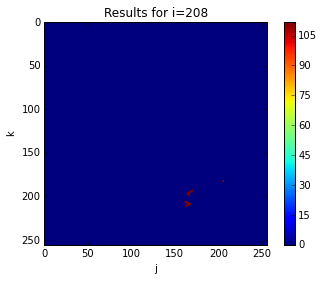

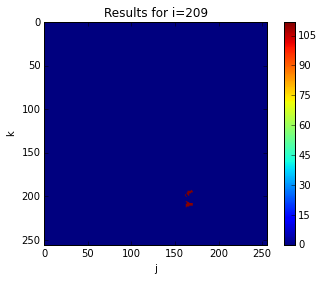

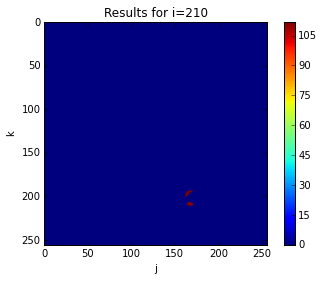

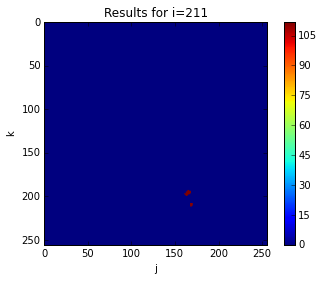

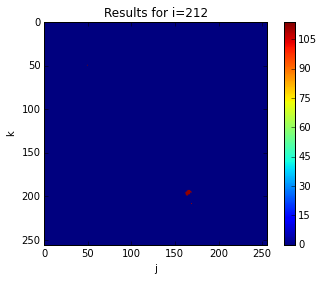

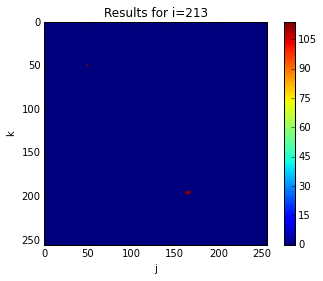

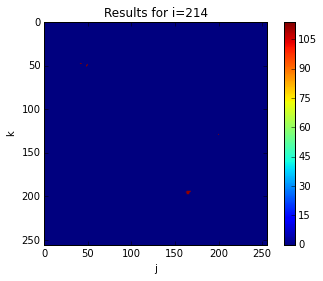

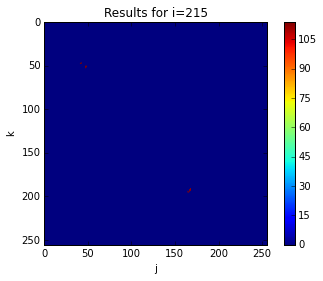

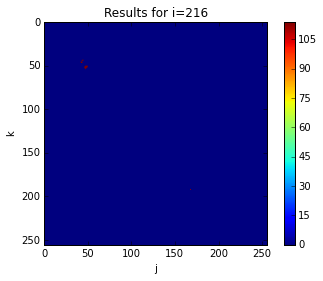

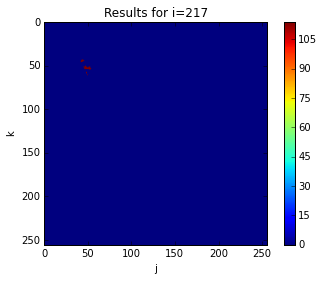

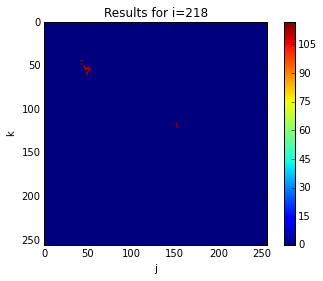

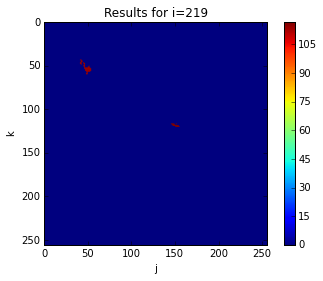

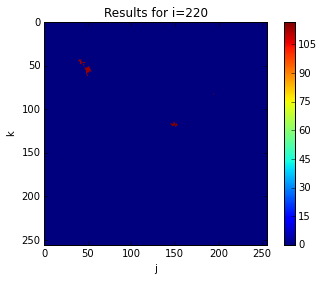

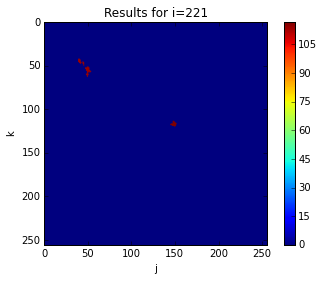

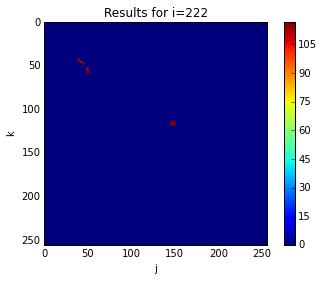

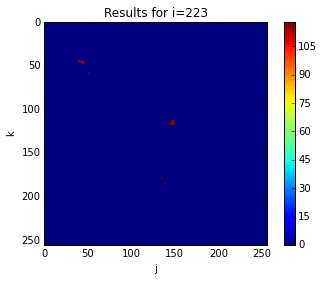

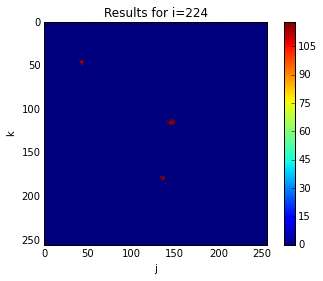

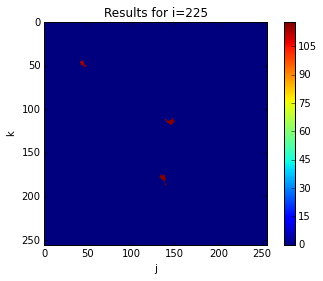

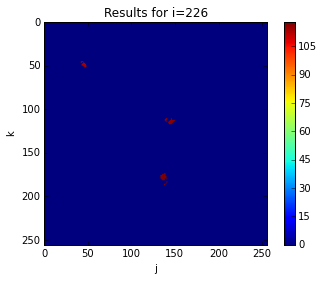

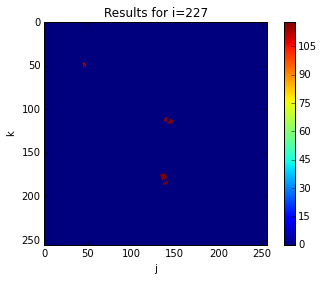

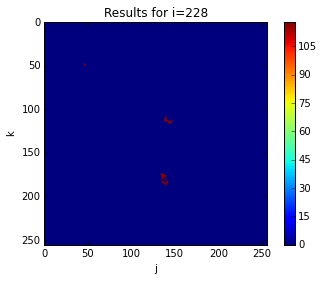

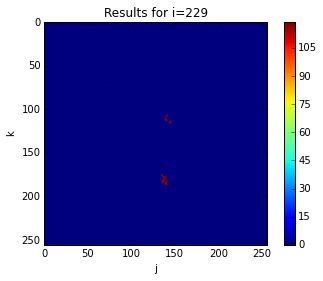

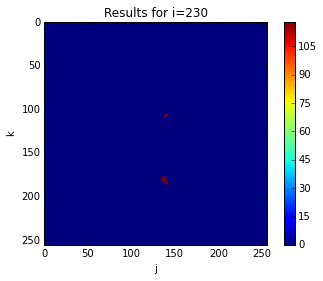

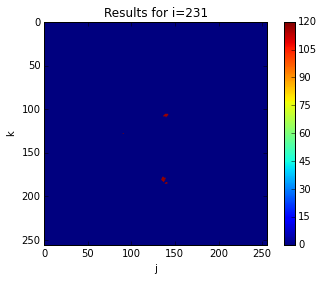

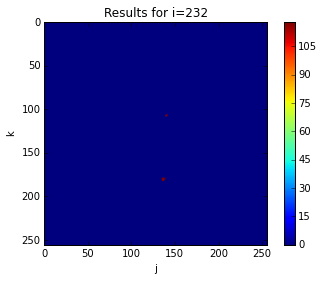

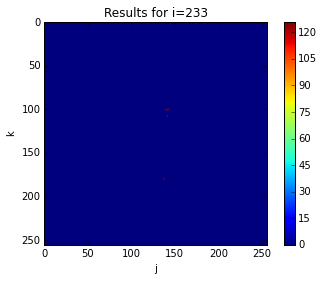

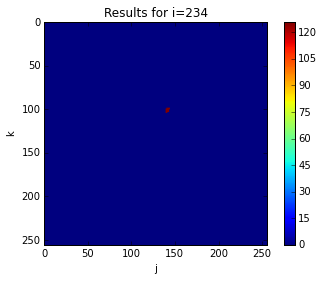

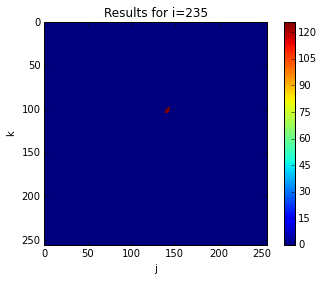

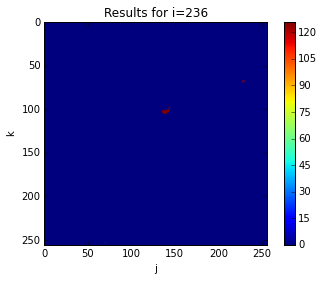

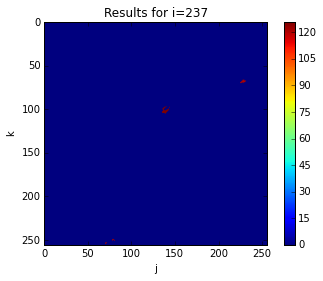

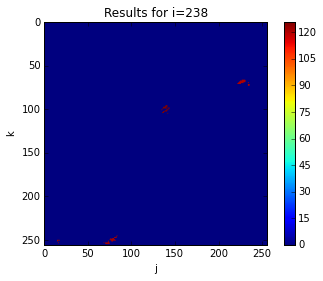

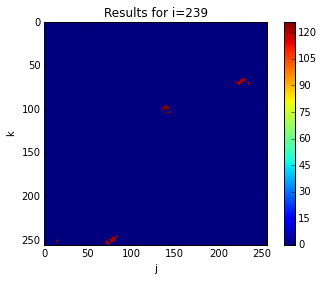

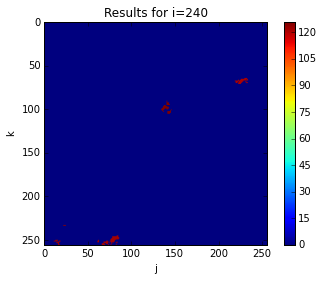

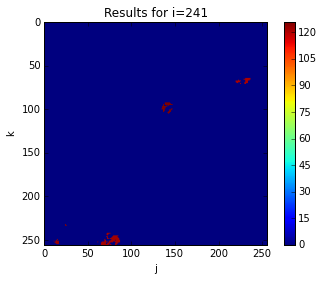

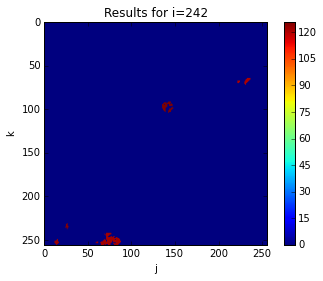

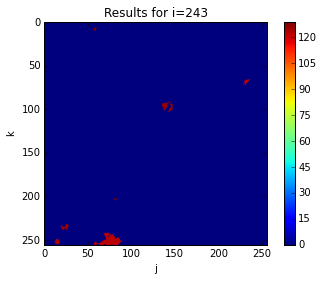

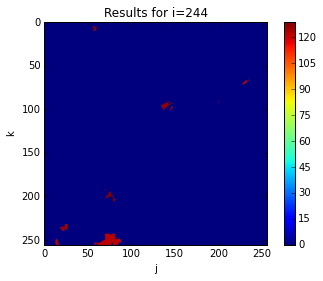

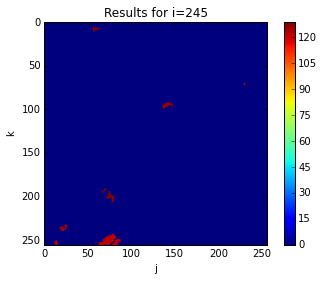

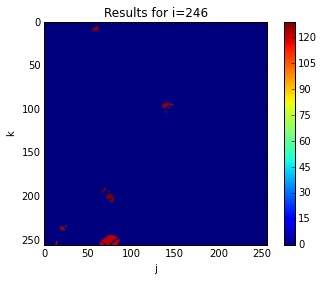

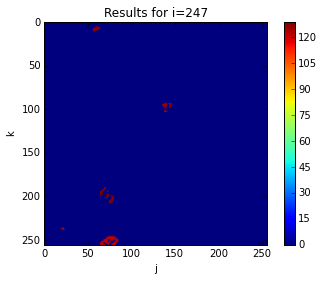

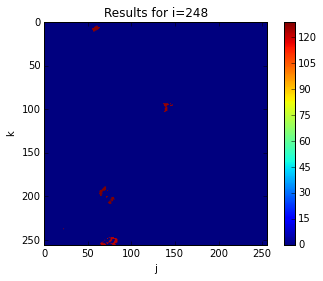

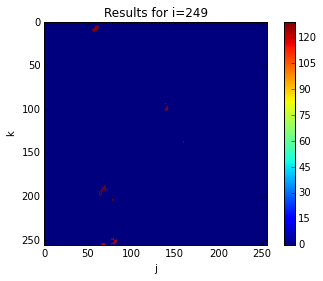

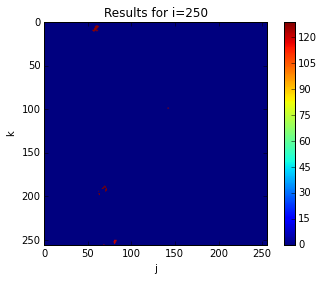

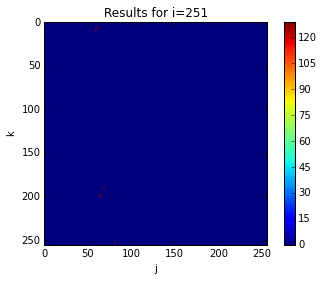

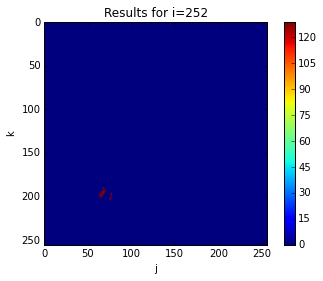

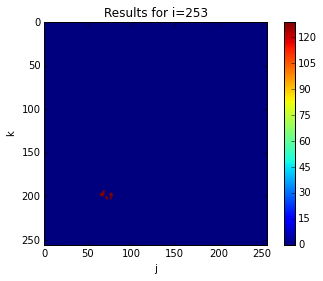

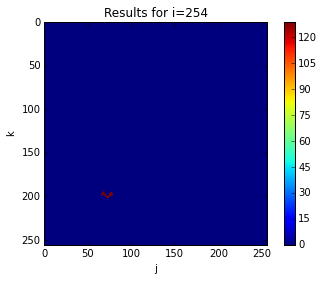

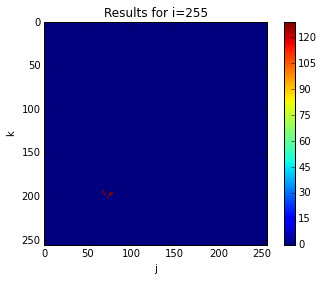

In [99]:
for i in range(n_grid+1):
    plt.figure()
    cut = results[i,:,:]
    plt.imshow(cut.T)
    colorbar()
    plt.title("Results for i="+str(i))
    plt.xlabel("j")
    plt.ylabel("k")
    plt.savefig("regions_"+str(i)+".png",format = 'png')
    plt.close(fig)